In [1]:
import csv
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import probscale

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

# Read Data into DataFrame

In [3]:
with open('C:\\AmesHousing.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    data = list(reader)

In [4]:
# Data is now in a list of lists format
data[:2]

[['Order',
  'PID',
  'MS SubClass',
  'MS Zoning',
  'Lot Frontage',
  'Lot Area',
  'Street',
  'Alley',
  'Lot Shape',
  'Land Contour',
  'Utilities',
  'Lot Config',
  'Land Slope',
  'Neighborhood',
  'Condition 1',
  'Condition 2',
  'Bldg Type',
  'House Style',
  'Overall Qual',
  'Overall Cond',
  'Year Built',
  'Year Remod/Add',
  'Roof Style',
  'Roof Matl',
  'Exterior 1st',
  'Exterior 2nd',
  'Mas Vnr Type',
  'Mas Vnr Area',
  'Exter Qual',
  'Exter Cond',
  'Foundation',
  'Bsmt Qual',
  'Bsmt Cond',
  'Bsmt Exposure',
  'BsmtFin Type 1',
  'BsmtFin SF 1',
  'BsmtFin Type 2',
  'BsmtFin SF 2',
  'Bsmt Unf SF',
  'Total Bsmt SF',
  'Heating',
  'Heating QC',
  'Central Air',
  'Electrical',
  '1st Flr SF',
  '2nd Flr SF',
  'Low Qual Fin SF',
  'Gr Liv Area',
  'Bsmt Full Bath',
  'Bsmt Half Bath',
  'Full Bath',
  'Half Bath',
  'Bedroom AbvGr',
  'Kitchen AbvGr',
  'Kitchen Qual',
  'TotRms AbvGrd',
  'Functional',
  'Fireplaces',
  'Fireplace Qu',
  'Garage Type',
 

In [5]:
# Create headings list for DataFrame
headings = data[0]

In [6]:
# Need to delete all spaces in the headings
headings = [re.sub(r'\s+', '', item) for item in headings]

In [7]:
df = pd.DataFrame.from_records(data[1:], columns=headings)

In [8]:
df.drop(['Order'], axis=1, inplace=True)

In [9]:
df

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,0526350040,020,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,0526351010,020,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,0526353030,020,RL,93,11160,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,0527105010,060,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0923275080,080,RL,37,7937,Pave,NA,IR1,Lvl,AllPub,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,0923276100,020,RL,,8885,Pave,NA,IR1,Low,AllPub,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,0923400125,085,RL,62,10441,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,0924100070,020,RL,77,10010,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


In [10]:
# DataFRame is full of 'NA' pr blank entries that need to be turned to proper NAN
df = df.replace(['NA', ''], np.NaN)

In [11]:
df

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0526301100,020,RL,141,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,0526350040,020,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,0526351010,020,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,0526353030,020,RL,93,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,0527105010,060,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0923275080,080,RL,37,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,0923276100,020,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,0923400125,085,RL,62,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,0924100070,020,RL,77,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [12]:
# Identify the numeric data columns from the data description document
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
        'SalePrice']

In [13]:
df[cols] = df[cols].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2930 non-null   object 
 1   MSSubClass     2930 non-null   float64
 2   MSZoning       2930 non-null   object 
 3   LotFrontage    2440 non-null   float64
 4   LotArea        2930 non-null   float64
 5   Street         2930 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2930 non-null   object 
 8   LandContour    2930 non-null   object 
 9   Utilities      2930 non-null   object 
 10  LotConfig      2930 non-null   object 
 11  LandSlope      2930 non-null   object 
 12  Neighborhood   2930 non-null   object 
 13  Condition1     2930 non-null   object 
 14  Condition2     2930 non-null   object 
 15  BldgType       2930 non-null   object 
 16  HouseStyle     2930 non-null   object 
 17  OverallQual    2930 non-null   float64
 18  OverallC

In [15]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Data Engineering

In [16]:
# Dropping those variables with less than 300 non-null values
df.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)
df.shape

(2930, 78)

In [17]:
df.MSZoning.unique() # C denotes commercial properties

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

In [18]:
# Delete all data with MSZoning = commercial, agriculture and industrial as these are not residential units
df = df[(df.MSZoning != 'C (all)') & (df.MSZoning != 'I (all)') & (df.MSZoning != 'A (agr)')]

In [19]:
# Notice a large number of null values in 'LotFrontage'. Examine the 'Lots' grouping.
df_lots = df[['LotFrontage', 'LotArea', 'LotConfig', 'LotShape']]
grouped_lots = df_lots.groupby(['LotShape'])
grouped_lots.mean()

,LotFrontage,LotArea
LotShape,,
IR1,74.768760,11506.414959
IR2,67.437500,18913.065789
IR3,117.636364,32064.187500
Reg,66.821387,8849.153301


In [20]:
grouped_lots2 = df_lots.groupby(['LotConfig'])
grouped_lots2.count()

,LotFrontage,LotArea,LotShape
LotConfig,,,
Corner,399,503,503
CulDSac,92,180,180
FR2,65,85,85
FR3,10,14,14
Inside,1848,2119,2119


In [21]:
# Generate 'Lots' group where there are null 'LotFrontage' values
df_LotFrontage_NA = df_lots.loc[(df['LotFrontage'].isnull())]
df_LotFrontage_NA.columns

Index(['LotFrontage', 'LotArea', 'LotConfig', 'LotShape'], dtype='object')

In [22]:
df_LotFrontage_NA.LotFrontage.isnull().sum()

487

In [23]:
# A reasonable assumption is that LotFrontage is linked to LotConfig and LotShape, and
# the other 'Lot' variables have all observations
# So I will replace all NA in 'LotFrontage' with its mean based on the corresponding 'LotShape', which is indexed at 3
df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 74.7688 if (x[3] == 'IR1') 
                                                           else x[0], axis=1)
df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 67.4375 if (x[3] == 'IR2') 
                                                           else x[0], axis=1)
df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 117.6364 if (x[3] == 'IR3') 
                                                           else x[0], axis=1)
df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 66.8214 if (x[3] == 'Reg') 
                                                           else x[0], axis=1)

C:\Users\camb7\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\camb7\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\camb7\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [24]:
LotFront_fills = df_LotFrontage_NA.LotFrontage
LotFront_fills.count()

487

In [25]:
df.LotFrontage.isnull().sum()

487

In [26]:
# Filling the 'LotFrontage' null values with the LotFront_fills series in the given order of the data
df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = LotFront_fills
df.LotFrontage.isnull().sum()

C:\Users\camb7\anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


0

In [27]:
# Adding structure age variable depending if there was a major remodeling
df['Age'] = df.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemod/Add']) 
                                                           else (x['YrSold']-x['YearRemod/Add']), axis=1)

C:\Users\camb7\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


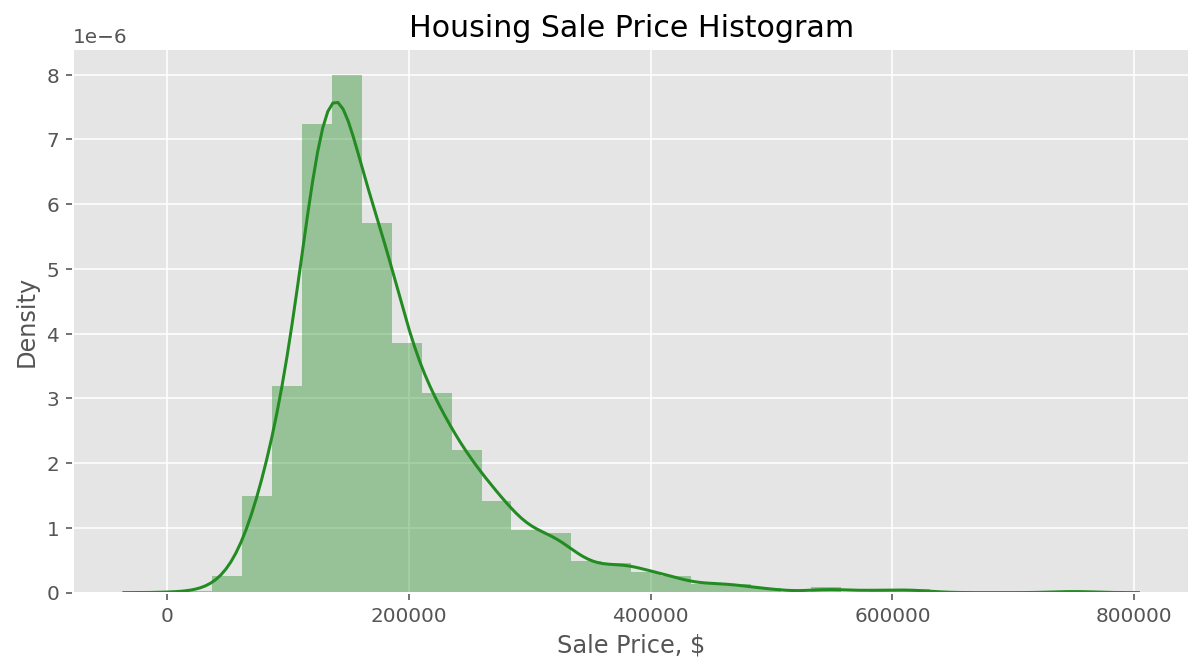

In [28]:
# The right-skew to the SalePrice is obvious in the histogram, showing that SalePrice has a long right tail
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(df.SalePrice, bins=30, kde=True, ax=ax, color='forestgreen')
plt.title('Housing Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price, $', fontsize=12);

### Creating variables on property area/size

In [29]:
# One of the chief factors affecting house prices in the size of the property.
# Here we examine the basement square footage variables. 
df[['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']].head()

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF
0,639.0,0.0,1080.0,441.0
1,468.0,144.0,882.0,270.0
2,923.0,0.0,1329.0,406.0
3,1065.0,0.0,2110.0,1045.0
4,791.0,0.0,928.0,137.0


In [30]:
# Here we examine the ground square footage variables. The first column is obviously the sum of the other two.
df[['GrLivArea', '1stFlrSF', '2ndFlrSF']].head()

,GrLivArea,1stFlrSF,2ndFlrSF
0,1656.0,1656.0,0.0
1,896.0,896.0,0.0
2,1329.0,1329.0,0.0
3,2110.0,2110.0,0.0
4,1629.0,928.0,701.0


In [31]:
df.GrLivArea.describe()

count    2901.000000
mean     1503.191658
std       504.934510
min       334.000000
25%      1131.000000
50%      1445.000000
75%      1744.000000
max      5642.000000
Name: GrLivArea, dtype: float64

In [32]:
# Create a total "finished" basement square footage variable
df['BaseLivArea'] = df.TotalBsmtSF - df.BsmtUnfSF

C:\Users\camb7\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


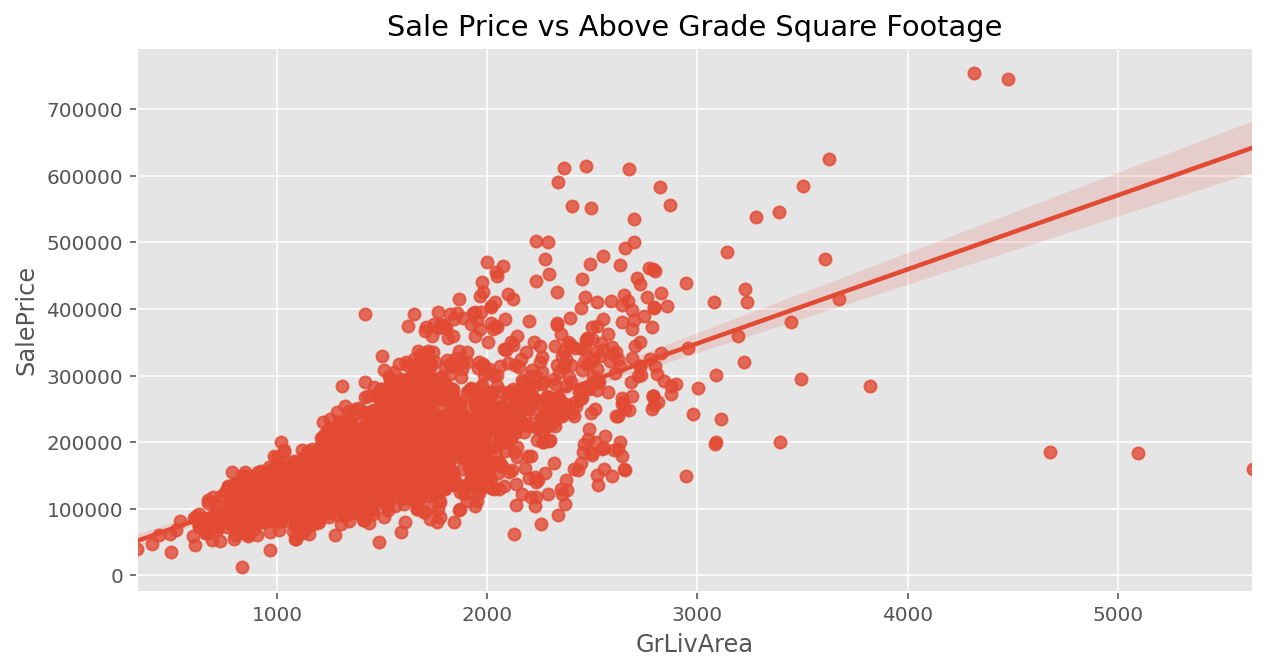

In [33]:
# Clear positive relationship between 'TSF' and 'SalePrice' variables, which is what one would expect.
# The larger the house, the higher its price, ceteris paribus
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="GrLivArea", y="SalePrice", data=df, ax=ax) 
ax.set_title('Sale Price vs Above Grade Square Footage');

In [34]:
# A simple linear regression of TSF on the SalePrice gives an R-squared of 50% by itself!
ols = LinearRegression()

X_GLA = df[['GrLivArea']]
y_SalePrice = df.SalePrice

ols.fit(X_GLA, y_SalePrice)
print("R-squared of Total Square Footage on Sale Price:", ols.score(X_GLA, y_SalePrice))

R-squared of Total Square Footage on Sale Price: 0.4989924240650856


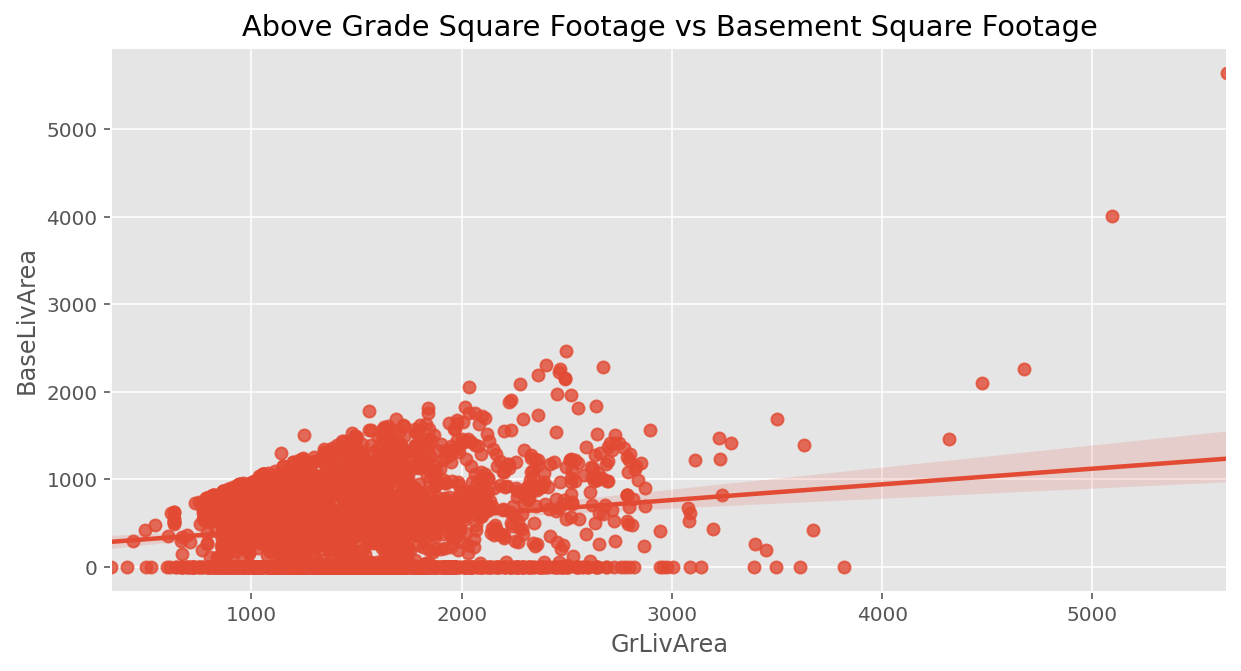

In [35]:
# There also appears to be a positive relationship between 'GrLivArea' and 'BaseLivArea', plus
# there seems to be greater variation in 'BaseLivArea' as 'GrLivArea' increases
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="GrLivArea", y="BaseLivArea", data=df, ax=ax) 
ax.set_title('Above Grade Square Footage vs Basement Square Footage');

In [36]:
df[['SalePrice', 'GrLivArea', 'BaseLivArea']].describe()

,SalePrice,GrLivArea,BaseLivArea
count,2901.000000,2901.000000,2900.000000
mean,181827.768011,1503.191658,495.894483
std,79550.512426,504.934510,477.414744
min,12789.000000,334.000000,0.000000
25%,130000.000000,1131.000000,0.000000
50%,161500.000000,1445.000000,465.000000
75%,214000.000000,1744.000000,812.000000
max,755000.000000,5642.000000,5644.000000


### Searching for outliers

In [37]:
# There are 45 instances of 'SalePrice' being 3 std above the mean
df.SalePrice[(df.SalePrice > np.mean(df.SalePrice) + 3*np.std(df.SalePrice))].count()

45

In [38]:
# But there are zero cases of the opposite
df.SalePrice[(df.SalePrice < np.mean(df.SalePrice) - 3*np.std(df.SalePrice))].count()

0

In [39]:
# There are 25 instances of 'GrLivArea' being 3 std above the mean, but zero of the opposite
df.GrLivArea[(df.GrLivArea > np.mean(df.GrLivArea) + 3*np.std(df.GrLivArea))].count()

25

In [40]:
df.GrLivArea[(df.GrLivArea < np.mean(df.GrLivArea) - 3*np.std(df.GrLivArea))].count()

0

In [41]:
# There are 6 instances of 'BaseLivArea' being 3 std above the mean, but zero of the opposite
df.BaseLivArea[(df.BaseLivArea > np.mean(df.BaseLivArea) + 3*np.std(df.BaseLivArea))].count()

16

In [42]:
df.BaseLivArea[(df.BaseLivArea < np.mean(df.BaseLivArea) - 3*np.std(df.BaseLivArea))].count()

0

In [43]:
df.shape

(2901, 80)

In [44]:
df_exout = df[(df.SalePrice < np.mean(df.SalePrice) + 3*np.std(df.SalePrice))]

In [45]:
df_exout = df_exout[(df_exout.GrLivArea < np.mean(df.GrLivArea) + 3*np.std(df.GrLivArea))]

In [46]:
df_exout = df_exout[(df_exout.BaseLivArea < np.mean(df.BaseLivArea) + 3*np.std(df.BaseLivArea))]

In [47]:
# All in all, 66 outliers are deleted
df_exout.shape 

(2835, 80)

It's no brainer that the larger the house, the higher the same price. Real estate professionals tend to speak about a property's value in per unit terms, in this case it would be the price per square foot. So I construct a price per square foot measure using 'GrLivArea' as the denominator. In the US, the basement square footage is typically not cited in housing sames and surveyors tend not to count basement size to a house's official square footage.

In [48]:
df_exout['PriceSF'] = df_exout.SalePrice / df_exout.GrLivArea

### Searching for non-commercial transactions

In [49]:
print(df_exout.SalePrice.mean())
print(df_exout.PriceSF.mean())

175876.4934744268
120.88661412002561


In [50]:
# 113 of these "abnormal" sale transactions are listed as "abnormal" or to family members, 
# and their mean SalePrice is well below the overall mean SalePrice
print(df_exout.SalePrice[(df_exout.SaleCondition == 'Abnorml') | (df_exout.SaleCondition == 'Family')].count())
df_exout.SalePrice[(df_exout.SaleCondition == 'Abnorml') | (df_exout.SaleCondition == 'Family')].mean()

218


140131.2752293578

In [51]:
# Even the mean 'PriceSF' of these "abnormal" sales is well below the overall mean
df_exout.PriceSF[(df_exout.SaleCondition == 'Abnorml') | (df_exout.SaleCondition == 'Family')].mean()

103.08140598125344

I chose to exclude these 219 "abnormal" sale transactions from the analysis. The reason is that if these transactions are not fully commercial in nature, then their inclusion in the dataset will detract from the "economic" or commercial relationship between a property's characteristic and its price. In other words, these "abnormal" transactions will introduce bias into the model estimates.

In [52]:
df_exout = df_exout[(df_exout.SaleCondition != 'Abnorml')]
df_exout = df_exout[(df_exout.SaleCondition != 'Family')]
df_exout.shape

(2617, 81)

C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


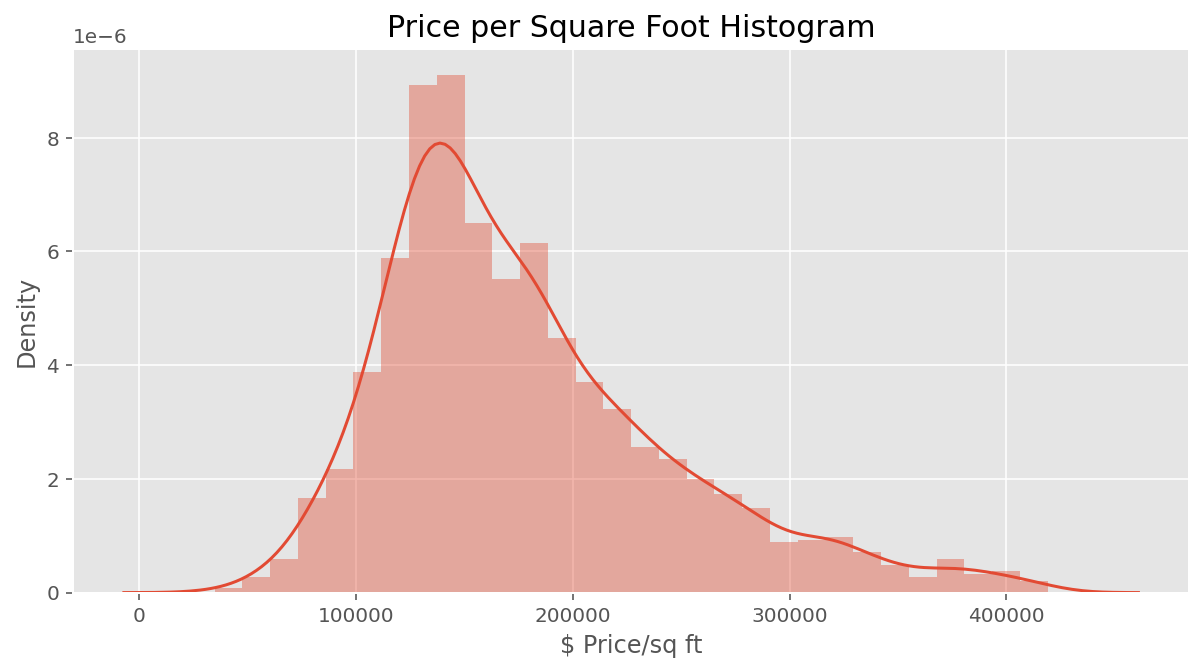

In [53]:
# Despite all the measures above, 'SalePrice' still very much skewed to the right
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df_exout.SalePrice, bins=30, kde=True, ax=ax)
plt.title('Price per Square Foot Histogram', fontsize=15)
plt.xlabel('$ Price/sq ft', fontsize=12);

C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


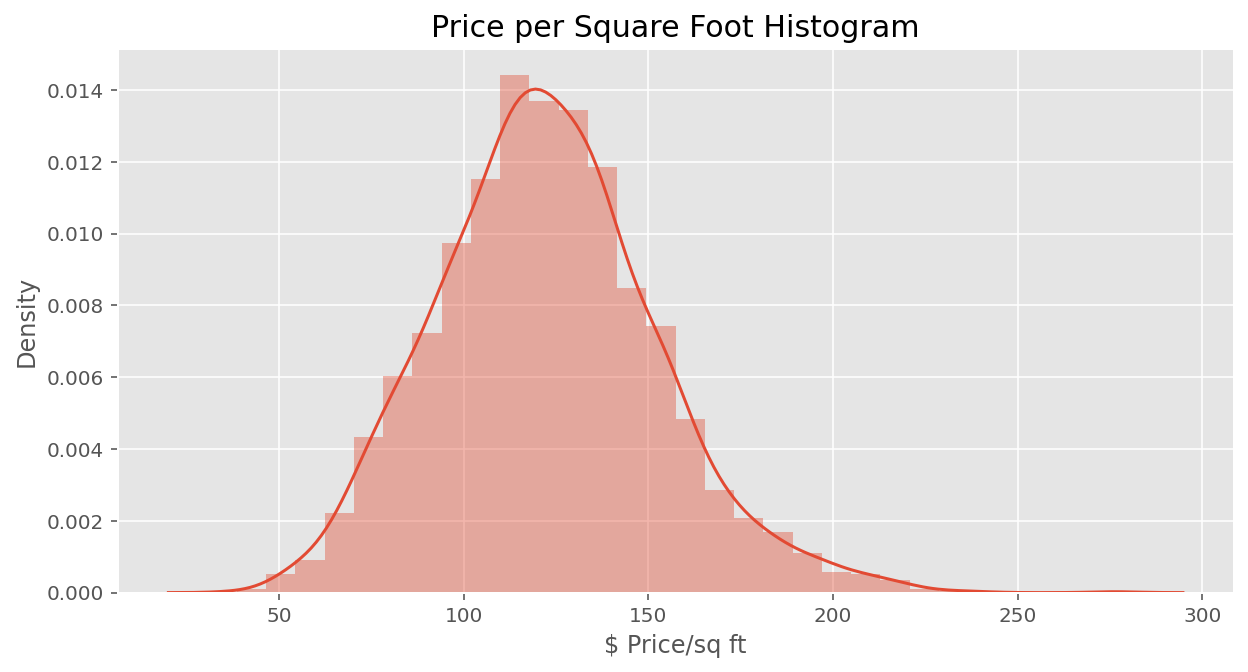

In [54]:
# Much less of a right-skew to the price per square foot, but still some
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df_exout.PriceSF, bins=30, kde=True, ax=ax)
plt.title('Price per Square Foot Histogram', fontsize=15)
plt.xlabel('$ Price/sq ft', fontsize=12);

### Log transformation of the target variable

In [55]:
# Transform both sale price variables by taking the natural log to reduce the right-skew of the distributions
# The log transformation is also appropriate given that both variables have only non-zero positive values
df_exout['LnSalePrice'] = np.log(df_exout.SalePrice)
df_exout['LnPriceSF'] = np.log(df_exout.PriceSF)

C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


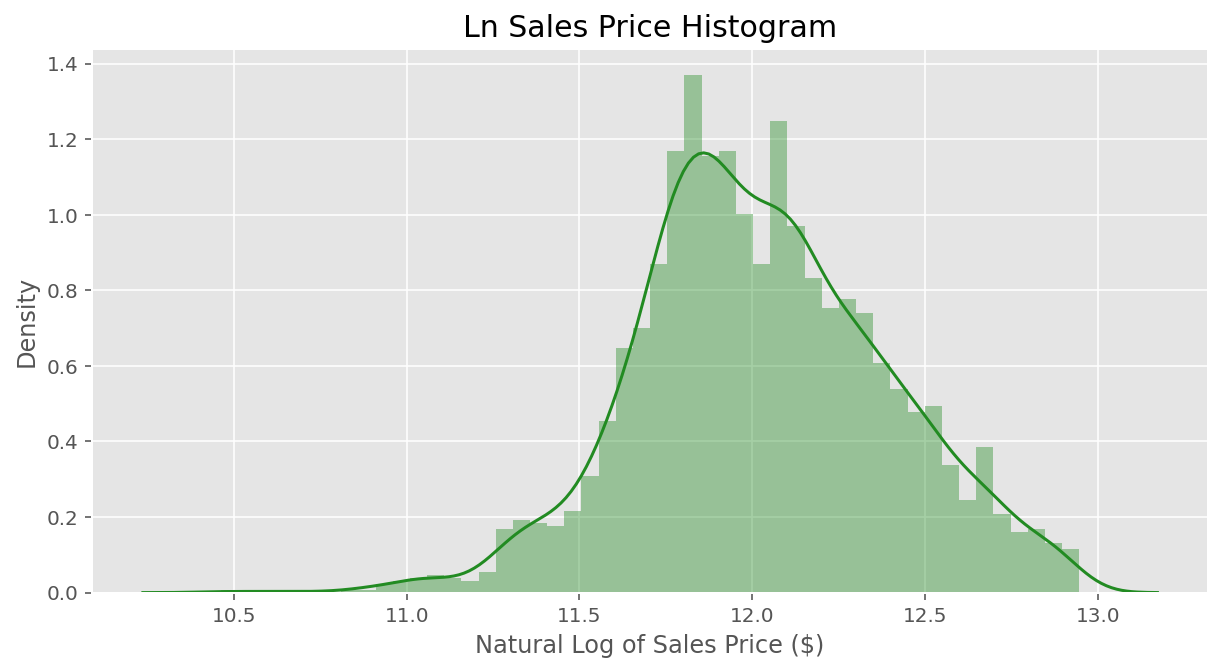

In [56]:
# The histogram of the ln SalePrice is clearly more symmetric
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df_exout.LnSalePrice, bins=50, kde=True, ax=ax, color='forestgreen')
plt.title('Ln Sales Price Histogram', fontsize=15)
plt.xlabel('Natural Log of Sales Price ($)', fontsize=12);

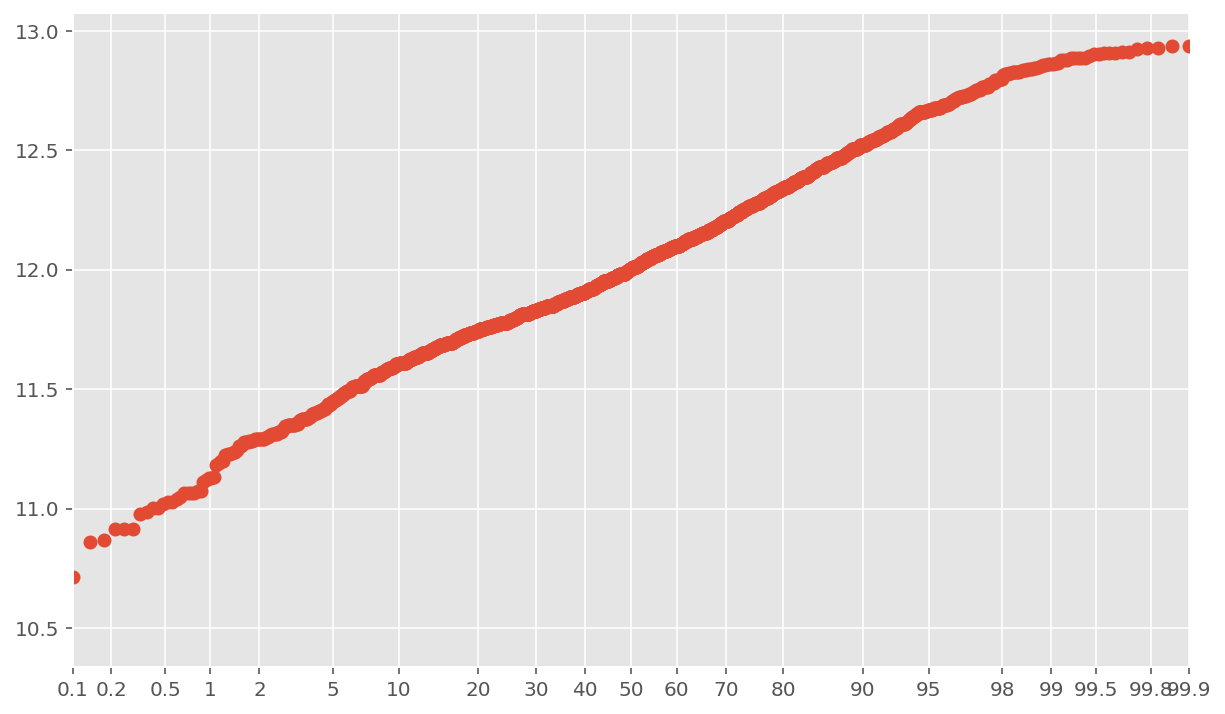

In [57]:
# Natural log of 'SalePrice' is closer to a normal distribution
fig, ax = plt.subplots(figsize=(10,6))
fig = probscale.probplot(df_exout.LnSalePrice, ax=ax, plottype='prob')

ax.set_xlim(0.1, 99.9)
ax.set_xscale('prob')
sns.despine(fig=fig)

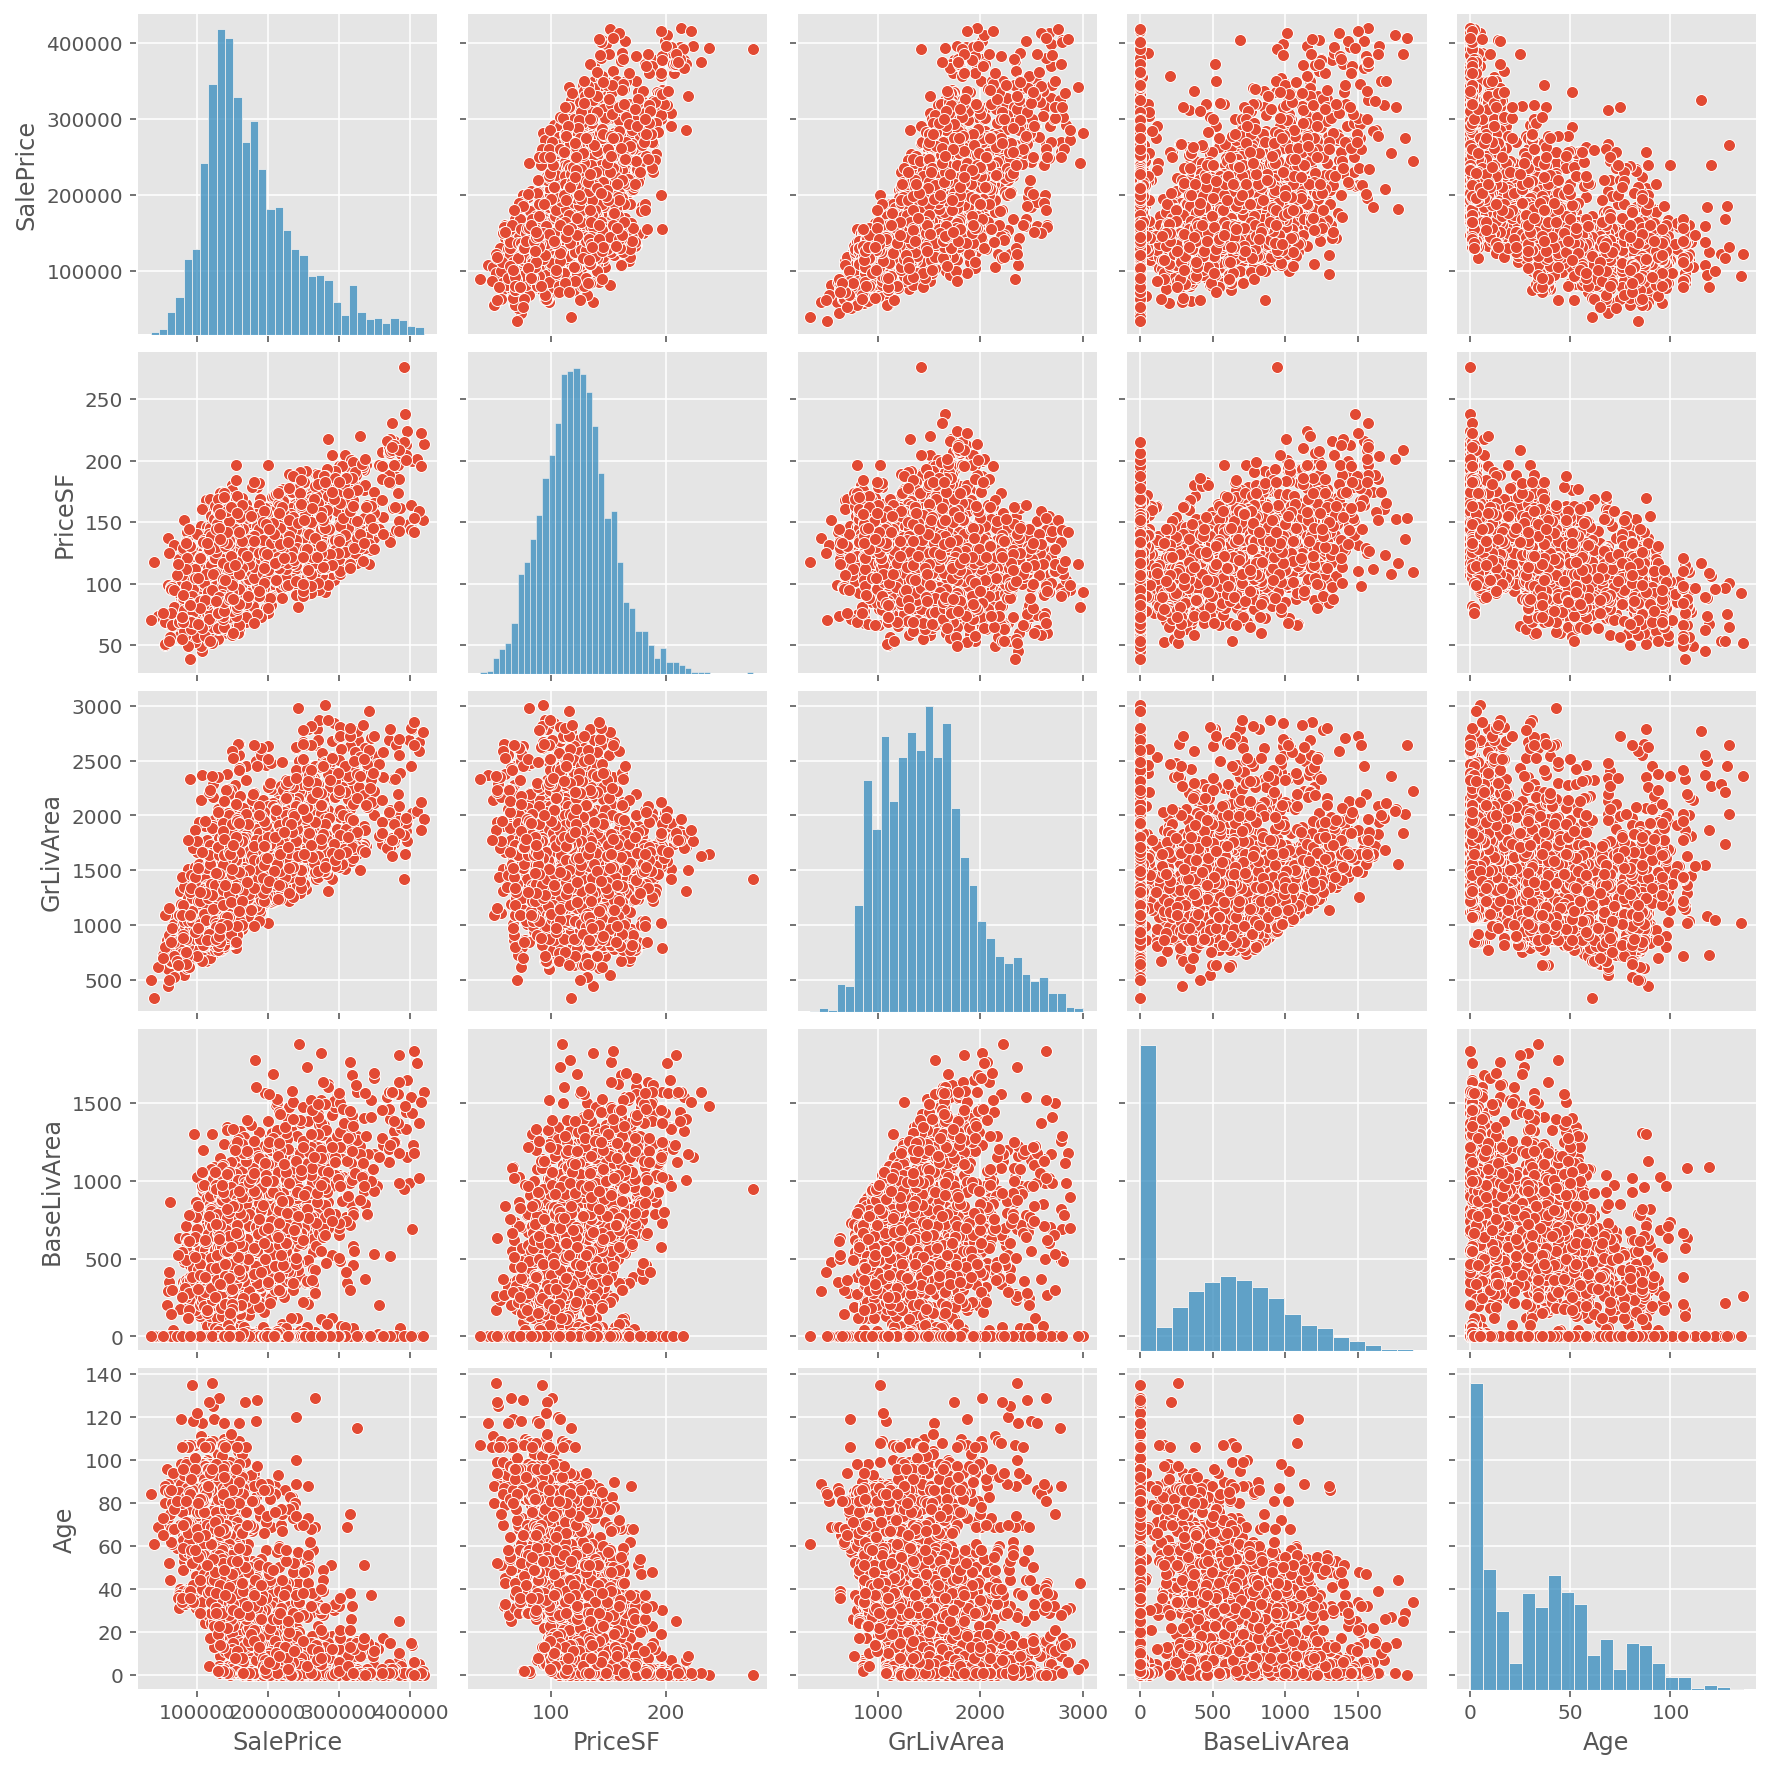

In [58]:
sns.pairplot(df_exout[['SalePrice', 'PriceSF', 'GrLivArea', 'BaseLivArea', 'Age']]);

Looking at the scatterplots of these key variables I have been working on, there are several notable observations. Although 'PriceSF' doesn't seem to a have a linear relationship with 'GrLivArea', it does appear to have a positive correlation with 'BaseLivArea'. This suggests that the size of the finished basement helps to raise 'PriceSF', which makes sense as it adds value to the property separate from 'GrLivArea'. Another interesting observation is that 'Age' seems to have more of a linear relationship with 'PriceSF' than with 'SalePrice'.

### Creating a "location" variable

In [59]:
# Examining the 'PriceSF' for the various neighbourhoods, it is obvious that the price premium differs significantly
# across them
neigh_mean = df_exout['PriceSF'].groupby(df_exout['Neighborhood']).count().sort_values()
neigh_mean

Neighborhood
Landmrk      1
GrnHill      2
Greens       8
Blueste     10
Veenker     21
NPkVill     22
BrDale      26
Blmngtn     28
MeadowV     34
StoneBr     38
ClearCr     38
SWISU       40
IDOTRR      57
NoRidge     60
Timber      66
Crawfor     94
BrkSide     98
Mitchel    103
NWAmes     117
SawyerW    118
Sawyer     137
NridgHt    141
Gilbert    158
Edwards    168
Somerst    173
OldTown    206
CollgCr    257
NAmes      396
Name: PriceSF, dtype: int64

In [60]:
len(neigh_mean)

28

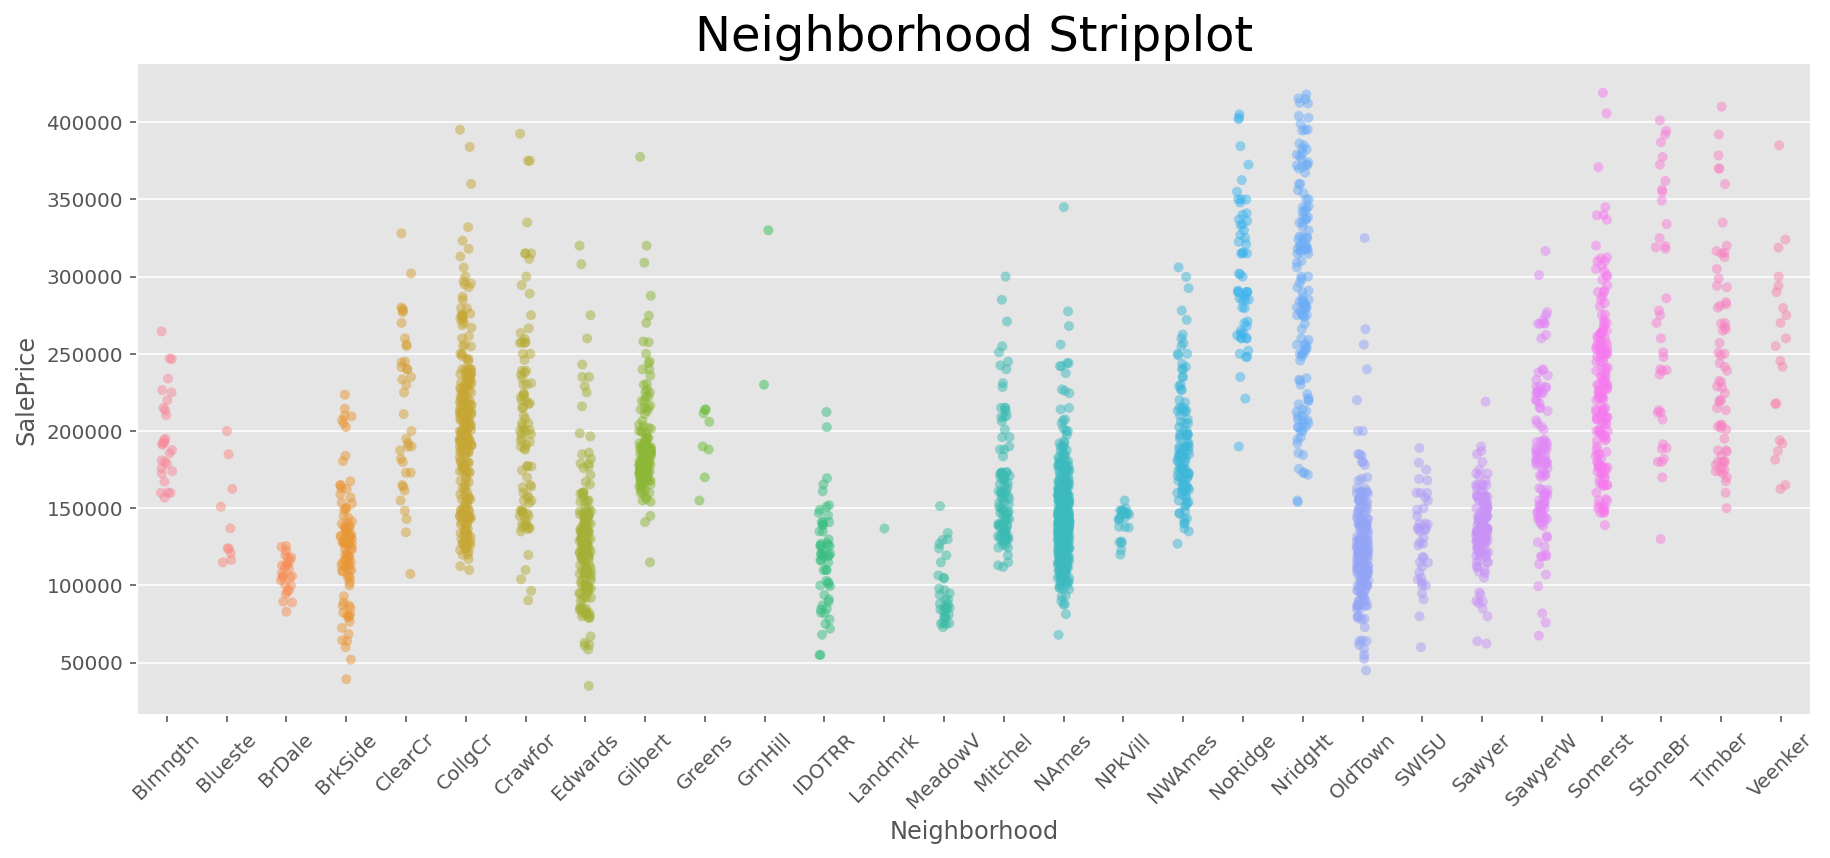

In [61]:
# Certain clusters of neighbourhoods do share similar distributions of 'SalePrice' and/or 'PriceSF'
fig, ax = plt.subplots(figsize=(15,6))

sns.stripplot(x = df_exout.Neighborhood, y = df_exout.SalePrice, order = np.sort(df_exout.Neighborhood.unique()),
              jitter=0.1, alpha=0.5, ax=ax)
plt.title('Neighborhood Stripplot', fontsize=24)
plt.xticks(rotation=45)
plt.show()

We know that one key determinant of house prices is "location, location, location," which may involve difficult to measure attributes such as socio-economic status, local amenities, good schools and/or neighbourhood aesthetics etc. Every house buyer understands that the geographical location of a house is a highly important factor in its price. There are however 28 separate neighbourhoods listed under the 'Neighborhood' variable, and it is probably not advisable to have 28 dummy variables on top of other relevant factors in the regression. So it is best we reduce the number of neighbourhood dummies. 

The problems with having a dummy of each neighbourhood are: 1) there are only a handful of observations for some neighbourhoods, with less than 30 for 8 neighbourhoods, and less than 100 for the majority of them; 2) there would be significant multicollinearity between certain neighbourhoods that share similar characteristics, as expressed through the distribution of the 'SalePrice' or 'PriceSF' (observable in the stripplot above). 

It is a problem analogous to whether a regression of car prices should incorporate individual brand dummies (i.e. individual dummies for Mercedes, BMW and Audi), or broader classes (i.e. 'top-end' or 'German'). It is probably advisable to try to collapse this neighbourhood factor into just several ordinal categories, and this is especially true in this case when the number of observations are simply inadequate to measure robustly each 28 neighbourhood's effects on housing prices. A collapsed 'Location' variable could offer more stable coefficient estimates, and hence reduce the model's variance across different samples. 

I was at first tempted to cluster the neighbourhoods by 'PriceSF', but that would be creating an explanatory variable that would be highly correlated to the target variable. A usual proxy would be to take average household income as a measure of a location/neighbourhood's desirability, but we do not have such data at hand. Instead, I looked at using some proxies from the available variables to construct the desirability of a neighbourhood, namely the variables on build quality and condition. The assumption behind this methodology is that the more "desirable" a neighbourhood, the better the quality of its housing structures and their condition. 

In [62]:
# Creating a new numeric ordinal variable for 'Functional'
def functional_numeric(x):
    if 'Typ' in x:
        return 8
    elif 'Min1' in x:
        return 7
    elif 'Min2' in x:
        return 6
    elif 'Mod' in x:
        return 5
    elif 'Maj1' in x:
        return 4
    elif 'Maj2' in x:
        return 3
    elif 'Sev' in x:
        return 2    
    else:
        return 1
    
df_exout['Functional_Num'] = df_exout.Functional.map(functional_numeric)

In [63]:
# Creating a new numeric ordinal variable for external conditon or 'ExterCond'
def extercond_numeric(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    else:
        return 1
    
df_exout['ExterCond_Num'] = df_exout.ExterCond.map(extercond_numeric)

In [64]:
# Creating a new numeric ordinal variable for external quality or 'ExterQual'
def exterqual_numeric(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    else:
        return 1
    
df_exout['ExterQual_Num'] = df_exout.ExterQual.map(exterqual_numeric)

In [65]:
print(df_exout['OverallQual'].mean())
print(df_exout['OverallCond'].mean())
print(df_exout['ExterQual_Num'].mean())
print(df_exout['ExterCond_Num'].mean())
print(df_exout['Functional_Num'].mean())

6.103553687428353
5.595338173481085
3.4016048910966754
3.088651127244937
7.858616736721436


Construct the location desirability proxy from the 5 individual mean-standardised variables listed above. The construction methodology implies a stronger weighting to the external quality/condition of the building.

In [66]:
df_exout['Location'] = ((df_exout['OverallQual']/df_exout['OverallQual'].mean()) 
                        + (df_exout['OverallCond']/df_exout['OverallCond'].mean())
                        + (df_exout['ExterQual_Num']/df_exout['ExterQual_Num'].mean())
                        + (df_exout['ExterCond_Num']/df_exout['ExterCond_Num'].mean()) 
                        + (df_exout['Functional_Num']/df_exout['Functional_Num'].mean()))

In [67]:
df_exout.Location.describe()

count    2617.000000
mean        5.000000
std         0.437242
min         2.087044
25%         4.747860
50%         5.041839
75%         5.269140
max         7.353587
Name: Location, dtype: float64

In [68]:
df_exout.Location.median()

5.041839076469422

In [69]:
# The average 'Location' scores of the respective neighbourhoods
df_exout['Location'].groupby([df_exout.Neighborhood]).mean().sort_values()

Neighborhood
MeadowV    4.616332
Edwards    4.687926
Sawyer     4.743020
Landmrk    4.747860
SWISU      4.754528
BrDale     4.778427
IDOTRR     4.787411
NAmes      4.824162
BrkSide    4.836702
Mitchel    4.846688
NPkVill    4.911514
OldTown    4.947847
ClearCr    4.954413
Gilbert    5.013664
SawyerW    5.020900
NWAmes     5.038560
Crawfor    5.132186
CollgCr    5.138734
Blueste    5.145065
GrnHill    5.205678
Blmngtn    5.229084
Timber     5.232063
Somerst    5.267111
NoRidge    5.380242
StoneBr    5.404945
Greens     5.414197
Veenker    5.463750
NridgHt    5.469528
Name: Location, dtype: float64

In [70]:
df_exout['SalePrice'].groupby([df_exout.Neighborhood]).count().sort_values()

Neighborhood
Landmrk      1
GrnHill      2
Greens       8
Blueste     10
Veenker     21
NPkVill     22
BrDale      26
Blmngtn     28
MeadowV     34
StoneBr     38
ClearCr     38
SWISU       40
IDOTRR      57
NoRidge     60
Timber      66
Crawfor     94
BrkSide     98
Mitchel    103
NWAmes     117
SawyerW    118
Sawyer     137
NridgHt    141
Gilbert    158
Edwards    168
Somerst    173
OldTown    206
CollgCr    257
NAmes      396
Name: SalePrice, dtype: int64

From the analysis above, there is a possible way to construct an ordinal measurement of locational desirability by using the percentiles of the distribution of the new 'Location' variable. I decided that with no additional information or insight, I should just allocate 4 ordinal values for 'Location': 1 (low), 2 (mid-low), 3 (mid-high) and 4 (high).

First, I sorted the 'Neighborhood' variable by the mean 'Location' values, then slice it in half at approximately the mean (5.00), so that there are 14 'Neighborhood' instances below and 14 above this arbitrary division. This resulted in all neighbourhoods above "SawyerW" (as listed above), which had a mean 'Location' reading of 5.02, to fall into the 1 and 2 readings of 'Location'. I then arbitrary assigned 'Location' = 1 for the 7 lowest neighbourhoods by their mean 'Location' values, and 'Location' = 2 for the remaining 7.

As for the fourteen neighbourhoods in the upper half of the 'Location' values, I divided them exactly in half again, with the lower 7 in terms of their mean 'Location' values assigned 'Location' = 3, and the remainder assigned 'Location' = 4. 

In this way, I have created an ordinal 'Location' desirability score of 1 to 4. The number of observations in the data also do not appear to be too unbalanced across these four ranks, though 61% of the observations are in the first two 'Location' categories. That said, there was a right skew to the 'SalePrice' as discussed above, so there will likely be a smaller number of expensive neighborhoods.

In [71]:
def add_location(x):
    if 'MeadowV' in x or 'Edwards' in x or 'Sawyer' in x or 'Landmrk' in x or 'SWISU' in x or 'BrDale' in x or 'IDOTRR' in x:
        return 1
    elif 'NAmes' in x or 'Mitchel' in x or 'BrkSide' in x or 'NPkVill' in x or 'OldTown' in x or 'ClearCr' in x or 'Gilbert' in x:
        return 2
    elif 'SawyerW' in x or 'NWAmes' in x or 'Crawfor' in x or 'CollgCr' in x or 'Blueste' in x or 'GrnHill' in x or 'Blmngtn' in x:
        return 3
    else:
        return 4

In [72]:
df_exout['Location'] = df_exout.Neighborhood.map(add_location)

In [73]:
df_exout['Location'].value_counts()

2    1021
1     581
3     508
4     507
Name: Location, dtype: int64

In [74]:
# Positive correlation between 'SalePrice' and 'PriceSF' with 'Location'
print(df_exout['SalePrice'].groupby(df_exout.Location).mean())
print(df_exout['PriceSF'].groupby(df_exout.Location).mean())

Location
1    138194.593804
2    151184.290891
3    198714.606299
4    261270.218935
Name: SalePrice, dtype: float64
Location
1    108.533247
2    113.431800
3    129.737730
4    148.842905
Name: PriceSF, dtype: float64


In [75]:
# Total mean house size also rises with 'Location'
print(df_exout['GrLivArea'].groupby(df_exout.Location).mean())
print(df_exout['GrLivArea'].groupby(df_exout.Location).median())

Location
1    1315.370052
2    1376.113614
3    1567.360236
4    1775.142012
Name: GrLivArea, dtype: float64
Location
1    1214.0
2    1344.0
3    1565.5
4    1692.0
Name: GrLivArea, dtype: float64


So it does appear that the 'Location' score does tend to be positively correlated with house prices, and somewhat with property sizes too.

# Other feature engineering on sale year, seasonality, zoning, and proximinity to railways & artery roads

In [76]:
df_exout['YrSold'] = df_exout['YrSold'].astype(np.int64)

In [77]:
# Looking at the 'SalePrice' and 'PriceSF' grouped by 'YrSold', there is an obvious impact of the financial crisis 
# that hit in 2007-2008. The mean 'SoldPrice' and 'PriceSF' in 2009 and 2010 are still lower than those in 2007.
print(df_exout.SalePrice.groupby(df_exout.YrSold).mean())
print(df_exout.PriceSF.groupby(df_exout.YrSold).mean())

YrSold
2006    180405.762963
2007    179753.426540
2008    179122.688969
2009    178999.132302
2010    173546.498382
Name: SalePrice, dtype: float64
YrSold
2006    121.286039
2007    123.869837
2008    122.638253
2009    121.761175
2010    121.856891
Name: PriceSF, dtype: float64


In [78]:
# House prices were in an uptrend in 2006-2007, but fell in 2008 and have been moribund since. 
df_exout.PriceSF.groupby(df_exout.YrSold).mean().pct_change()

YrSold
2006         NaN
2007    0.021303
2008   -0.009943
2009   -0.007152
2010    0.000786
Name: PriceSF, dtype: float64

In [79]:
# Thus, it might be useful to incorporate year dummies in the regression model
df_exout = pd.get_dummies(df_exout, columns=['YrSold'])

In [80]:
# Clear price differentials according to the discrete housing zones
df_exout.SalePrice.groupby(df_exout.MSZoning).mean()

MSZoning
FV    220161.447761
RH    130250.000000
RL    186635.804284
RM    128617.762836
Name: SalePrice, dtype: float64

In [81]:
# Creating a new ordinal variable of zoning, corresponding to the mean values from 'MSZoning'
# The FV observations in 'MSZoning' are a retirement community development, named "Floating Village", which appears 
# wealthy retireesto cater to

def add_zoning(x):
    if 'RM' in x:
        return 1
    elif 'RH' in x:
        return 2
    elif 'RL' in x:
        return 3
    else:
        return 4

In [82]:
df_exout['Zoning'] = df_exout.MSZoning.map(add_zoning)

In [83]:
# No strong linear relationship between 'GrLivArea' or 'BaseLivArea' and 'Zoning'
print(df_exout.GrLivArea.groupby(df_exout.Zoning).mean())
df_exout.BaseLivArea.groupby(df_exout.Zoning).mean()

Zoning
1    1312.369193
2    1398.450000
3    1503.565725
4    1585.119403
Name: GrLivArea, dtype: float64


Zoning
1    278.310513
2    420.800000
3    524.361733
4    385.507463
Name: BaseLivArea, dtype: float64

In [84]:
# There appears to be a sizeable jump in prices in the low density and FV categories
print(df_exout.SalePrice.groupby(df_exout.Zoning).mean())
df_exout.PriceSF.groupby(df_exout.Zoning).mean()

Zoning
1    128617.762836
2    130250.000000
3    186635.804284
4    220161.447761
Name: SalePrice, dtype: float64


Zoning
1    102.015245
2     98.920928
3    125.501798
4    139.988488
Name: PriceSF, dtype: float64

In [85]:
# There is a relationship between 'Location' and 'Zoning' with Locations 3 and 4 
# primarily in zones 3 and 4 (low density and the retirement village)
df_exout.Location.groupby(df_exout.Zoning).value_counts()

Zoning  Location
1       2           240
        1           131
        3            37
        4             1
2       1            12
        2             6
        3             2
3       2           775
        3           469
        1           438
        4           372
4       4           134
Name: Location, dtype: int64

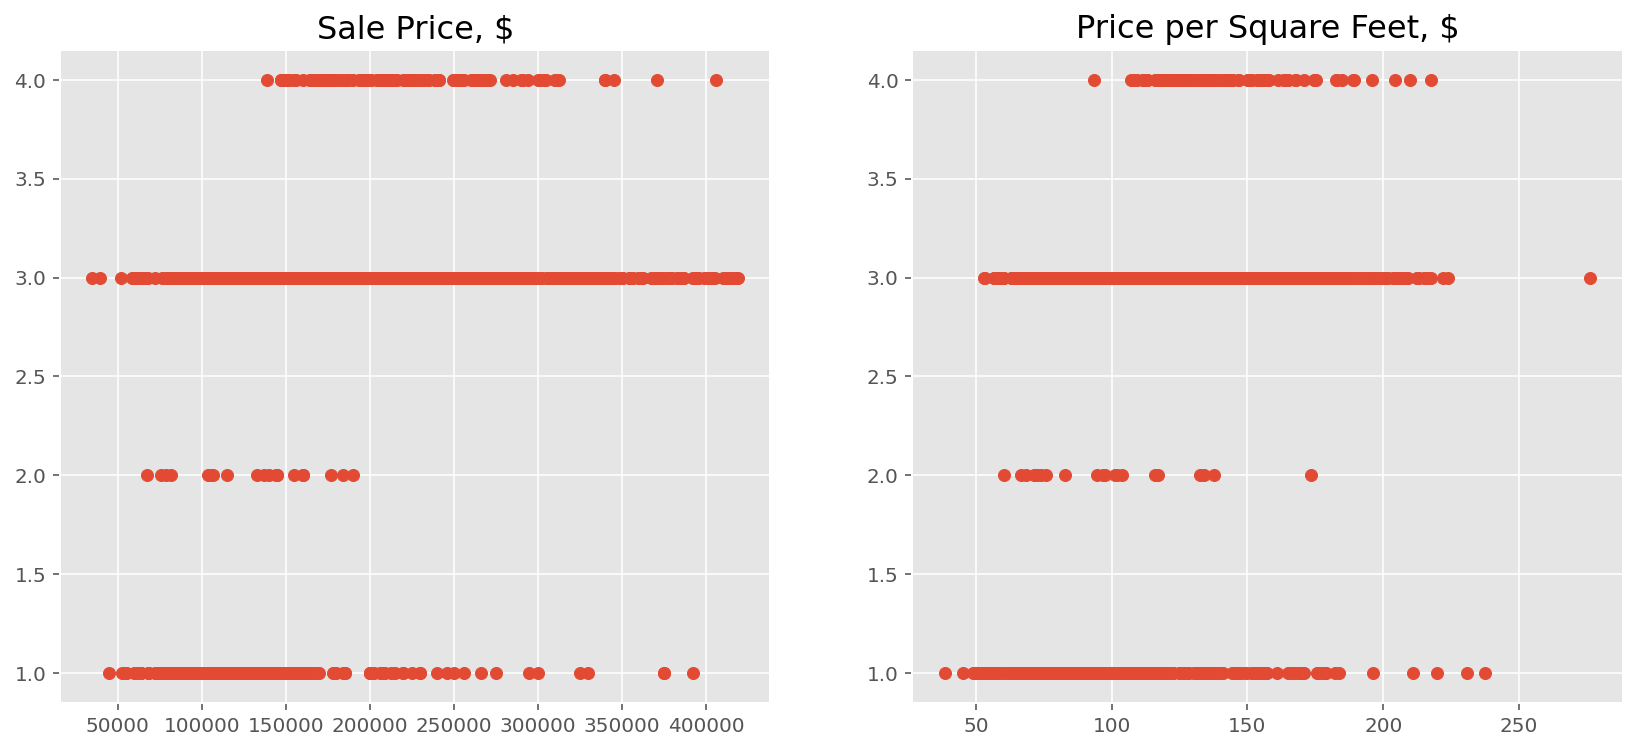

In [86]:
# There is a general increase inprices as we go from Zone 1 to 3, especially in mean 'PriceSF'
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

ax[0].scatter(df_exout.SalePrice, df_exout.Zoning)
ax[0].set_title('Sale Price, $', fontsize=16)
ax[1].scatter(df_exout.PriceSF, df_exout.Zoning)
ax[1].set_title('Price per Square Feet, $', fontsize=16)
#fig.suptitle('Sale Prices by Zone', fontsize=24)
plt.show()

In [87]:
# Analysis above suggests that it might be more useful to model 'Zoning' using dummies instead of an ordinal variable
df_exout['Zone_ordinal'] = df_exout['Zoning']
df_exout = pd.get_dummies(df_exout, columns=['Zoning'])

In [88]:
# The overwhelming majority of observations fall into the double-'Norm' category in terms of
# Condition1 and Condition2, which is a measure of environmental condition
df_exout.Condition1.groupby(df_exout.Condition2).value_counts()

Condition2  Condition1
Artery      Artery           1
            RRNn             1
Feedr       RRAn             8
            Feedr            3
            RRNn             1
Norm        Norm          2263
            Feedr          136
            Artery          75
            RRAn            37
            PosN            32
            RRAe            25
            PosA            17
            RRNn             6
            RRNe             4
PosA        Artery           1
            PosA             1
PosN        PosN             2
RRAe        Feedr            1
RRAn        Feedr            1
RRNn        Feedr            2
Name: Condition1, dtype: int64

In [89]:
# Previous studies have shown a negative relationship between housing prices and being adjacent 
# or near to a major roadway or a railway line.
# Creating variables to capture this negative enviromental impact
def add_roadrail1(x):
    if 'Artery' in x:
        return 1
    elif 'RRAn' in x:
        return 1
    elif 'RRNn' in x:
        return 1
    elif 'RRAe' in x:
        return 1
    elif 'RRNe' in x:
        return 1
    else:
        return 0

df_exout['RoadRail1'] = df_exout.Condition1.map(add_roadrail1)

In [90]:
def add_roadrail2(x):
    if 'Artery' in x:
        return 1
    elif 'RRAn' in x:
        return 1
    elif 'RRNn' in x:
        return 1
    elif 'RRAe' in x:
        return 1
    elif 'RRNe' in x:
        return 1
    else:
        return 0

df_exout['RoadRail2'] = df_exout.Condition2.map(add_roadrail2)

In [91]:
df_exout.RoadRail1.groupby(df_exout.RoadRail2).value_counts()

RoadRail2  RoadRail1
0          0            2454
           1             157
1          0               4
           1               2
Name: RoadRail1, dtype: int64

In [92]:
# Combining the 2 proximity to artery roads and railroad dummy variables into one
df_exout['RoadRail'] = df_exout.apply(lambda x: 1 if (x['RoadRail1'] == 1 | x['RoadRail2'] == 1) 
                                      else 0, axis=1)
df_exout.drop(['RoadRail1', 'RoadRail2'], axis=1, inplace=True)

In [93]:
# The RoadRail variable seems to have an impact on mean 'SalePrice' and 'PriceSF' in every 'Location'
print(df_exout.SalePrice.groupby([df_exout.RoadRail, df_exout.Location]).mean())
df_exout.PriceSF.groupby([df_exout.RoadRail, df_exout.Location]).mean()

RoadRail  Location
0         1           139132.013060
          2           152111.176915
          3           199110.281124
          4           261031.189135
1         1           127028.888889
          2           142043.617021
          3           179010.000000
          4           273150.000000
Name: SalePrice, dtype: float64


RoadRail  Location
0         1           108.666221
          2           114.734104
          3           130.069818
          4           148.727217
1         1           106.949380
          2           100.588870
          3           113.199754
          4           154.592604
Name: PriceSF, dtype: float64

### More (minor) feature engineering

In [94]:
# Transforming the 'CentralAir' discrete variable to numeric
df_exout['CentralAirNum'] = df_exout.apply(lambda x: 1 if (x['CentralAir'] == 'Y') 
                                                           else 0, axis=1)
#df_exout[['CentralAir', 'CentralAirNum']]
df_exout['CentralAirNum'].value_counts()

1    2465
0     152
Name: CentralAirNum, dtype: int64

In [95]:
# Creating variables on positive neighbourhood amenities
def add_amenities1(x):
    if 'PosN' in x:
        return 1
    elif 'PosA' in x:
        return 1
    else:
        return 0

df_exout['Amenities1'] = df_exout.Condition1.map(add_amenities1)

In [96]:
def add_amenities2(x):
    if 'PosN' in x:
        return 1
    elif 'PosA' in x:
        return 1
    else:
        return 0

df_exout['Amenities2'] = df_exout.Condition2.map(add_amenities2)

In [97]:
# Combining the amenities dummy variables into one
df_exout['Amenities'] = df_exout.apply(lambda x: 1 if (x['Amenities1'] == 1 | x['Amenities2'] == 1) 
                                      else 0, axis=1)
df_exout.drop(['Amenities1', 'Amenities2'], axis=1, inplace=True)

In [98]:
# 'Amenities'=1 does seem to raise the mean 'SalePrice' but has mixed impact on 'PriceSF'
print(df_exout.SalePrice.groupby([df_exout.Amenities, df_exout.Location]).mean())
df_exout.PriceSF.groupby([df_exout.Amenities, df_exout.Location]).mean()

Amenities  Location
0          1           137982.801038
           2           150879.137041
           3           197069.480167
           4           260569.862275
1          1           179000.000000
           2           173133.571429
           3           225887.551724
           4           319750.000000
Name: SalePrice, dtype: float64


Amenities  Location
0          1           108.385444
           2           113.546139
           3           130.210397
           4           148.480976
1          1           137.009921
           2           105.207578
           3           121.930565
           4           179.063978
Name: PriceSF, dtype: float64

In [99]:
# At this point, all the observations in the sample have full public utility service
df_exout[(df_exout.Utilities != 'AllPub')].count()

PID              1
MSSubClass       1
MSZoning         1
LotFrontage      1
LotArea          1
                ..
Zoning_3         1
Zoning_4         1
RoadRail         1
CentralAirNum    1
Amenities        1
Length: 99, dtype: int64

In [100]:
# Adding up the above ground bathrooms and assigning to a new variable
df_exout['Bathrooms'] = df_exout.FullBath + (0.5*df_exout.HalfBath)
df_exout.Bathrooms.describe()

count    2617.000000
mean        1.757738
std         0.628060
min         0.000000
25%         1.000000
50%         2.000000
75%         2.500000
max         5.000000
Name: Bathrooms, dtype: float64

In [101]:
# Positive relationship between the overall quality of the housing structure and the 'SalePrice' and 'PriceSF'
print(df_exout.SalePrice.groupby([df_exout.OverallQual]).mean())
df_exout.PriceSF.groupby([df_exout.OverallQual]).mean()

OverallQual
1.0      50150.000000
2.0      58667.111111
3.0      87770.689655
4.0     109863.445652
5.0     135816.621769
6.0     162948.944776
7.0     205672.802102
8.0     266258.361111
9.0     341216.761905
10.0    366957.333333
Name: SalePrice, dtype: float64


OverallQual
1.0      92.571273
2.0      92.689487
3.0      90.229760
4.0     100.208193
5.0     114.006923
6.0     116.030656
7.0     126.365056
8.0     147.828978
9.0     178.511137
10.0    176.209673
Name: PriceSF, dtype: float64

In [102]:
# Interestingly 'OverallQual' is not well correlated with 'OverallCond'
df_exout.OverallQual.corr(df_exout.OverallCond)

-0.1359432957046222

In [103]:
# But it is moderately correlated with the 'Location' variable as one would expect
df_exout.OverallQual.corr(df_exout.Location)

0.6253793053742017

In [104]:
# Overall Condition of the house appears to have mixed impact on prices
print(df_exout.SalePrice.groupby([df_exout.OverallCond]).mean())
df_exout.PriceSF.groupby([df_exout.OverallCond]).mean()

OverallCond
1.0     58000.000000
2.0    142261.714286
3.0     95744.138889
4.0    119924.219512
5.0    201306.443396
6.0    151080.516667
7.0    154871.446023
8.0    153281.834532
9.0    188300.000000
Name: SalePrice, dtype: float64


OverallCond
1.0     59.061222
2.0     88.624891
3.0     80.767567
4.0     89.005222
5.0    129.065319
6.0    115.397512
7.0    118.068083
8.0    118.683092
9.0    123.331215
Name: PriceSF, dtype: float64

### Dummifying other potential important features

In [105]:
df_exout = pd.get_dummies(df_exout, columns=['Street'])

In [106]:
df_exout.drop(['Street_Grvl'], axis=1, inplace=True)
df_exout.rename(columns={'Street_Pave': 'Street_dum'}, inplace=True)

In [107]:
df_exout = pd.get_dummies(df_exout, columns=['KitchenQual'])

In [108]:
# Creating a dummy variable for flat roofs
df_exout['FlatRoof_dum'] = df_exout.RoofStyle.apply(lambda x: 1 if x=='Flat' else 0)

In [109]:
# Creating a dummy variable for garage
df_exout['Garage_dum'] = df_exout.GarageQual.apply(lambda x: 0 if pd.isnull(x)==True else 1)

In [110]:
# Creating a dummy variable for flat property contour
df_exout['FlatContour_dum'] = df_exout.LandContour.apply(lambda x: 1 if x=='Lvl' else 0)

In [111]:
# Creating a dummy variable for houses higher than one storey
df_exout['TwoStory_dum'] = df_exout['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)

In [112]:
df_exout.shape

(2617, 108)

# Finalising the dataset

In [113]:
pd.options.display.max_columns = None
df_exout.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,BaseLivArea,PriceSF,LnSalePrice,LnPriceSF,Functional_Num,ExterCond_Num,ExterQual_Num,Location,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,Zone_ordinal,Zoning_1,Zoning_2,Zoning_3,Zoning_4,RoadRail,CentralAirNum,Amenities,Bathrooms,Street_dum,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,FlatRoof_dum,Garage_dum,FlatContour_dum,TwoStory_dum
0,0526301100,20.0,RL,141.0,31770.0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,5.0,1960.0,1960.0,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,Typ,2.0,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210.0,62.0,0.0,0.0,0.0,0.0,NaN,0.0,5.0,WD,Normal,215000.0,50.0,639.0,129.830918,12.278393,4.866233,8,3,3,2,0,0,0,0,1,3,0,0,1,0,0,1,0,1.0,1,0,0,0,0,1,0,1,1,0
1,0526350040,20.0,RH,80.0,11622.0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,1961.0,1961.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,Typ,0.0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,MnPrv,0.0,6.0,WD,Normal,105000.0,49.0,612.0,117.187500,11.561716,4.763775,8,3,3,2,0,0,0,0,1,2,0,1,0,0,0,1,0,1.0,1,0,0,0,0,1,0,1,1,0
2,0526351010,20.0,RL,81.0,14267.0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1958.0,1958.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,Typ,0.0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NaN,12500.0,6.0,WD,Normal,172000.0,52.0,923.0,129.420617,12.055250,4.863068,8,3,3,2,0,0,0,0,1,3,0,0,1,0,0,1,0,1.5,1,0,0,1,0,0,0,1,1,0
3,0526353030,20.0,RL,93.0,11160.0,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7.0,5.0,1968.0,1968.0,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,Typ,2.0,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,4.0,WD,Normal,244000.0,42.0,1065.0,115.639810,12.404924,4.750480,8,3,4,2,0,0,0,0,1,3,0,0,1,0,0,1,0,2.5,1,1,0,0,0,0,0,1,1,0
4,0527105010,60.0,RL,74.0,13830.0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,1997.0,1998.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,Typ,1.0,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,MnPrv,0.0,3.0,WD,Normal,189900.0,13.0,791.0,116.574586,12.154253,4.758531,8,3,3,2,0,0,0,0,1,3,0,0,1,0,0,1,0,2.5,1,0,0,0,0,1,0,1,1,1


In [114]:
df_exout = df_exout[['SalePrice', 'LnSalePrice', 'Age', 'GrLivArea', 'BaseLivArea', 'Location', 'Amenities', 
                     'RoadRail', 'BedroomAbvGr', 'Bathrooms', 'OverallCond', 'OverallQual', 'LotFrontage', 
                     'LotArea', 'TwoStory_dum', 'FlatContour_dum', 'FlatRoof_dum', 'GarageArea', 'Garage_dum', 
                     'CentralAirNum', 'LowQualFinSF', 'Fireplaces', 'KitchenQual_Ex', 'Zoning_2', 'Zoning_3', 
                     'Zoning_4', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009', 'YrSold_2010']]

In [115]:
# Saving engineered dataset
#df_exout.to_csv(r'C:\\ames_engineered.csv', index=False)

### Now on to the regression analysis!